# Using mpathic to compute footprints

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.insert(0, '/home/tom/mpathic')


In [3]:
from mpathic import learn_model

First we import a test data set.

In [4]:
df = pd.read_csv("../../../data/processed_barcodes/20221114_barcode/LB_by_promoter/rspAp_counts.csv")
df.head(5)

,cDNA_count,gDNA_count,barcode,name,mapping_count,promoter
0,66678,1006,GTCAAAGGCTACTTTTTCTC,rspAp,170,TTCCTTCTTTTCTCGACCATTCACAGCGCATATATACCCATTTTCT...
1,54854,5380,AGACACCTTACGAAGCACTG,rspAp,95,TTTCATCTTTTGACAAGCATTCAGAGCGCAAATAGACGCCTTTTTT...
2,39960,1044,CACGGGAGGACTGACGCCAG,rspAp,171,TTTCATCATTTGCCAACCATTCACAGCGCAAATATAGGCCTTTTTT...
3,33885,365,TTTTCCTCAGGGCATAGCTC,rspAp,119,TTTCATCTTTTGTCAACCATTCACAGCGCATACAGACGCCTTTTTT...
4,31128,1273,CACTGTCGGACGTCAATACT,rspAp,350,GTTCAGCTATTGTCAACCATTCGCAGCGCAAATATACGCTTTTTTT...


Prep dataframe to work with mpathic, therefore renaming columns and sorting the dataframe.

In [5]:
df.rename(
    columns={
        "cDNA_count": "ct_1",
        "gDNA_count": "ct_0",
        "promoter": "seq"
    },
    inplace=True
)
df['ct'] = df['ct_0'] + df['ct_1']
df = df[['ct', 'ct_0', 'ct_1', 'seq']]
df.head(5)

,ct,ct_0,ct_1,seq
0,67684,1006,66678,TTCCTTCTTTTCTCGACCATTCACAGCGCATATATACCCATTTTCT...
1,60234,5380,54854,TTTCATCTTTTGACAAGCATTCAGAGCGCAAATAGACGCCTTTTTT...
2,41004,1044,39960,TTTCATCATTTGCCAACCATTCACAGCGCAAATATAGGCCTTTTTT...
3,34250,365,33885,TTTCATCTTTTGTCAACCATTCACAGCGCATACAGACGCCTTTTTT...
4,32401,1273,31128,GTTCAGCTATTGTCAACCATTCGCAGCGCAAATATACGCTTTTTTT...


Run mpathic on dataframe.

## Reg Seq data, re-processed

In [6]:
df_mcmc = pd.read_csv("rspA_mcmc_mpathic_regseq_data2.csv", index_col=0)
df_mcmc

,pos,val_A,val_C,val_G,val_T
0,0,-0.000287,0.000360,0.000563,-0.000636
1,1,0.001715,-0.000152,-0.003685,0.002122
2,2,0.001929,-0.000984,0.000633,-0.001578
3,3,-0.002412,0.002891,0.000134,-0.000613
4,4,0.002481,-0.002765,0.001357,-0.001073
...,...,...,...,...,...
155,155,0.001062,0.000134,-0.001957,0.000761
156,156,0.000128,-0.000469,0.003830,-0.003489
157,157,-0.001993,0.000256,-0.003083,0.004820
158,158,0.002636,-0.000052,-0.004805,0.002221


In [7]:
mcmc_arr = df_mcmc[['val_A', 'val_C', 'val_G', 'val_T']].to_numpy()

Transform phenotype output to probabilities using exponential distribution.

In [8]:
norm = np.sum(np.exp(mcmc_arr), axis=1)
exp_vec = [np.exp(mcmc_arr)[i, :] / norm[i] for i in range(160)] 
rel_entropy = [np.sum([x[i] * np.log2(x[i] / 0.25) for i in range(4)]) for x in exp_vec]

Text(0.5, 1.0, 'rspA in LB')

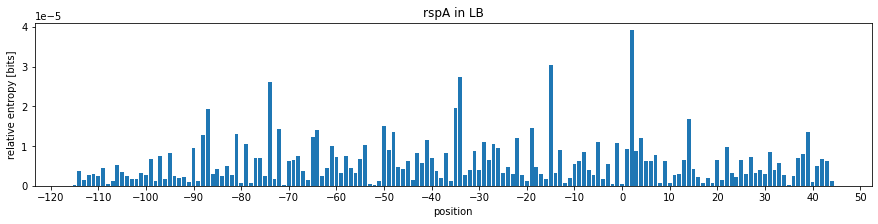

In [9]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.bar(np.arange(-115, 45), rel_entropy)
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')

Text(0.5, 1.0, 'rspA in LB')

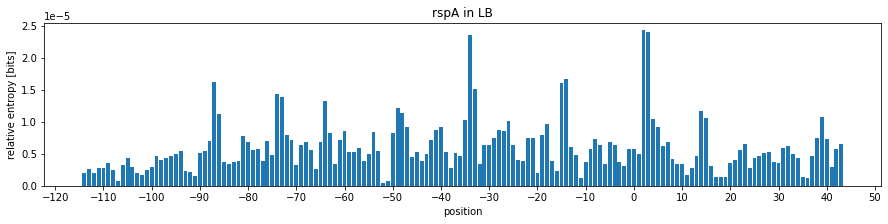

In [10]:
fig, ax = plt.subplots(figsize=(15, 3))

d = 1

ax.bar(np.arange(-115+d, 45-d), [np.mean(rel_entropy[i-d:i+d]) for i in range(d, 160-d)])
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')

## RegSeq dataset for rspA

Run mpathic on dataframe.

In [11]:
df_mcmc = pd.read_csv("rspA_mcmc_mpathic_regseq_data.csv", index_col=0)
df_mcmc

,pos,val_A,val_C,val_G,val_T
0,0,-0.027768,0.010674,0.002477,0.014617
1,1,-0.030472,0.024170,-0.008575,0.014877
2,2,0.002316,0.010473,-0.017288,0.004499
3,3,-0.002471,-0.013041,-0.015547,0.031058
4,4,0.021851,-0.013582,-0.017939,0.009669
...,...,...,...,...,...
155,155,0.004111,0.016529,0.016855,-0.037494
156,156,0.008809,-0.035737,0.011172,0.015756
157,157,0.011666,-0.018856,0.025697,-0.018508
158,158,-0.009589,-0.014251,0.006636,0.017205


In [12]:
mcmc_arr = df_mcmc[['val_A', 'val_C', 'val_G', 'val_T']].to_numpy()

Transform phenotype output to probabilities using exponential distribution.

In [13]:
norm = np.sum(np.exp(mcmc_arr), axis=1)
exp_vec = [np.exp(mcmc_arr)[i, :] / norm[i] for i in range(160)] 
rel_entropy = [np.sum([x[i] * np.log2(x[i] / 0.25) for i in range(4)]) for x in exp_vec]

Text(0.5, 1.0, 'rspA in LB')

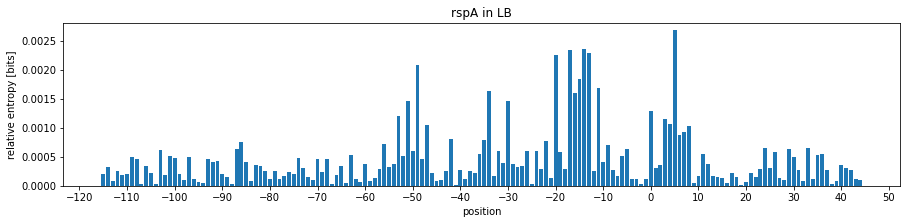

In [14]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.bar(np.arange(-115, 45), rel_entropy)
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')

Text(0.5, 1.0, 'rspA in LB')

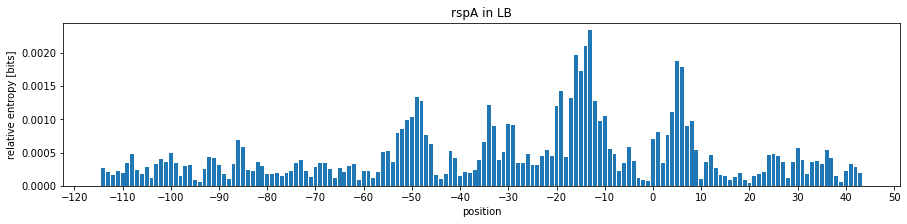

In [15]:
fig, ax = plt.subplots(figsize=(15, 3))

d = 1

ax.bar(np.arange(-115+d, 45-d), [np.mean(rel_entropy[i-d:i+d]) for i in range(d, 160-d)])
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')

In [16]:
df_mcmc = pd.read_csv("rspA_mcmc_mpathic.csv", index_col=0)
df_mcmc

,pos,val_A,val_C,val_G,val_T
0,0,-0.002352,-0.014152,0.001432,0.015072
1,1,0.036721,-0.019553,-0.026683,0.009514
2,2,-0.038035,0.036018,0.024049,-0.022031
3,3,-0.005439,0.012558,0.013207,-0.020325
4,4,-0.001129,-0.002335,-0.035807,0.039270
...,...,...,...,...,...
155,155,0.014464,0.005694,-0.018776,-0.001381
156,156,-0.024386,-0.005898,0.015516,0.014769
157,157,0.033540,-0.034722,-0.007027,0.008208
158,158,-0.019241,0.012793,0.014486,-0.008038


In [17]:
mcmc_arr = df_mcmc[['val_A', 'val_C', 'val_G', 'val_T']].to_numpy()

Transform phenotype output to probabilities using exponential distribution.

In [18]:
norm = np.sum(np.exp(mcmc_arr), axis=1)
exp_vec = [np.exp(mcmc_arr)[i, :] / norm[i] for i in range(160)] 
rel_entropy = [np.sum([x[i] * np.log2(x[i] / 0.25) for i in range(4)]) for x in exp_vec]

Text(0.5, 1.0, 'rspA in LB')

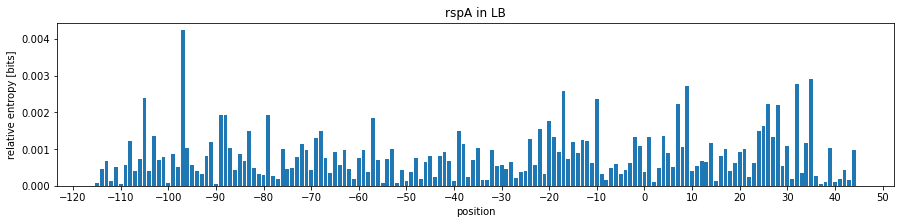

In [19]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.bar(np.arange(-115, 45), rel_entropy)
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')

Text(0.5, 1.0, 'rspA in LB')

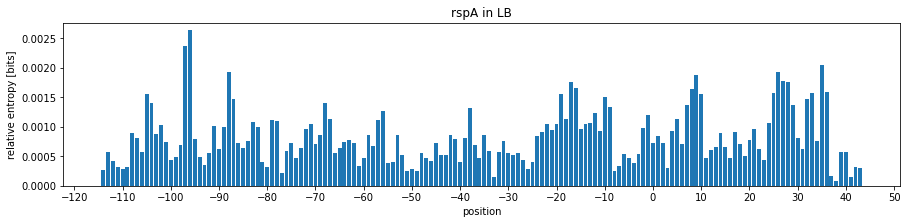

In [21]:
fig, ax = plt.subplots(figsize=(15, 3))

d = 1

ax.bar(np.arange(-115+d, 45-d), [np.mean(rel_entropy[i-d:i+d]) for i in range(d, 160-d)])
ax.set_xlabel('position')
ax.set_xticks(np.linspace(-120, 50, 18))
ax.set_ylabel('relative entropy [bits]')
ax.set_title('rspA in LB')